<a href="https://colab.research.google.com/github/Aipakazuma/2-4recommendation-system/blob/master/colab%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

なるほど、ランタイムはGPUに設定する必要がある

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
mode

In [12]:
!pip freeze | grep Keras

Keras==2.2.4
Keras-Applications==1.0.6
Keras-Preprocessing==1.0.5


Keras入っている

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 69s 0us/step


In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

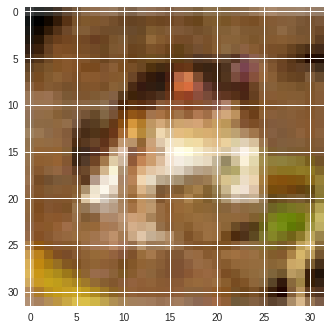

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

# label

* 0 airplane										
* 1 automobile										
* 2 bird										
* 3 cat										
* 4 deer										
* 5 dog										
* 6 frog										
* 7 horse										
* 8 ship										
* 9 truck

# 前処理

In [0]:
# 画像を0-1の範囲で正規化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 正解ラベルをOne-Hot表現に変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# モデル構築

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.utils import np_utils

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [13]:
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=20, verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 110us/step - loss: 1.9946 - acc: 0.2697 - val_loss: 1.8863 - val_acc: 0.3178
Epoch 2/20
45000/45000 [==============================] - 3s 66us/step - loss: 1.8493 - acc: 0.3295 - val_loss: 1.8230 - val_acc: 0.3472
Epoch 3/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.8161 - acc: 0.3454 - val_loss: 1.8246 - val_acc: 0.3452
Epoch 4/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.7859 - acc: 0.3544 - val_loss: 1.7972 - val_acc: 0.3538
Epoch 5/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.7628 - acc: 0.3663 - val_loss: 1.7530 - val_acc: 0.3692
Epoch 6/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.7484 - acc: 0.3724 - val_loss: 1.7492 - val_acc: 0.3756
Epoch 7/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.7299 - acc: 0.3805 - val_loss: 1.7416 - val_acc

In [21]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

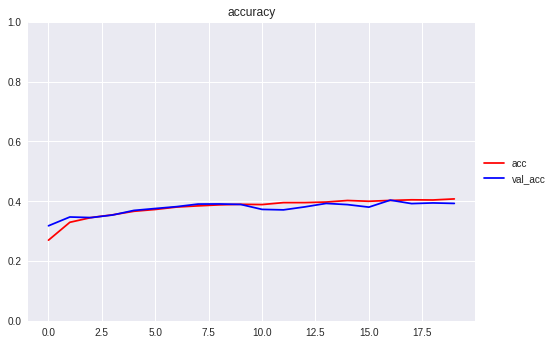

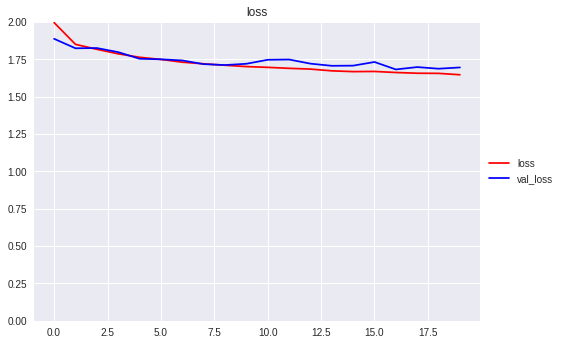

In [22]:
epochs = 20
x = range(epochs)
plt.plot(x, history.history['acc'], label='acc', color='r')
plt.plot(x, history.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label='loss', color='r')
plt.plot(x, history.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# パラメータを変えてみる

In [0]:
model2 = Sequential()
model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dense(512))
model2.add(Activation('relu'))

model2.add(Dense(512))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
batch_size = 128
epochs = 20
history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 4s 86us/step - loss: 1.4539 - acc: 0.4821 - val_loss: 1.4764 - val_acc: 0.4884
Epoch 2/20
45000/45000 [==============================] - 4s 85us/step - loss: 1.4226 - acc: 0.4945 - val_loss: 1.4660 - val_acc: 0.4822
Epoch 3/20
45000/45000 [==============================] - 4s 84us/step - loss: 1.3914 - acc: 0.5050 - val_loss: 1.4277 - val_acc: 0.4954
Epoch 4/20
45000/45000 [==============================] - 4s 83us/step - loss: 1.3649 - acc: 0.5146 - val_loss: 1.4703 - val_acc: 0.4786
Epoch 5/20
45000/45000 [==============================] - 4s 84us/step - loss: 1.3392 - acc: 0.5214 - val_loss: 1.4200 - val_acc: 0.4970
Epoch 6/20
45000/45000 [==============================] - 4s 84us/step - loss: 1.3187 - acc: 0.5318 - val_loss: 1.3956 - val_acc: 0.5062
Epoch 7/20
45000/45000 [==============================] - 4s 84us/step - loss: 1.2958 - acc: 0.5384 - val_loss: 1.4209 - val_acc:

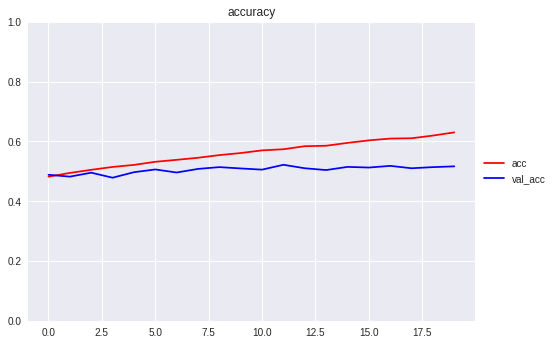

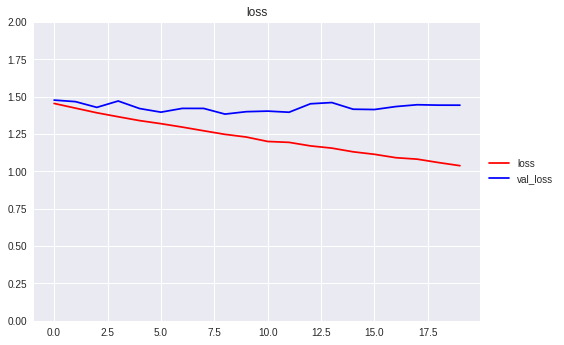

In [29]:
epochs = 20
x = range(epochs)
plt.plot(x, history.history['acc'], label='acc', color='r')
plt.plot(x, history.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label='loss', color='r')
plt.plot(x, history.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [0]:
# 3
model3 = Sequential()
model3.add(Flatten(input_shape=(32, 32, 3)))
model3.add(Dense(1024))
model3.add(Activation('relu'))

model3.add(Dense(512))
model3.add(Activation('relu'))

model3.add(Dense(512))
model3.add(Activation('relu'))

model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
batch_size = 128
epochs = 20
history3 = model3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 117us/step - loss: 1.8754 - acc: 0.3242 - val_loss: 1.7423 - val_acc: 0.3864
Epoch 2/20
45000/45000 [==============================] - 5s 105us/step - loss: 1.6763 - acc: 0.4025 - val_loss: 1.6571 - val_acc: 0.4026
Epoch 3/20
45000/45000 [==============================] - 5s 105us/step - loss: 1.5776 - acc: 0.4359 - val_loss: 1.5634 - val_acc: 0.4410
Epoch 4/20
45000/45000 [==============================] - 5s 106us/step - loss: 1.5245 - acc: 0.4547 - val_loss: 1.5619 - val_acc: 0.4408
Epoch 5/20
45000/45000 [==============================] - 5s 106us/step - loss: 1.4665 - acc: 0.4726 - val_loss: 1.4695 - val_acc: 0.4852
Epoch 6/20
45000/45000 [==============================] - 5s 103us/step - loss: 1.4303 - acc: 0.4865 - val_loss: 1.4808 - val_acc: 0.4730
Epoch 7/20
45000/45000 [==============================] - 5s 103us/step - loss: 1.4031 - acc: 0.4957 - val_loss: 1.4397 - v

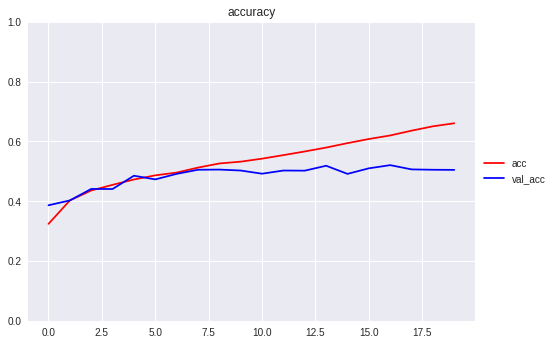

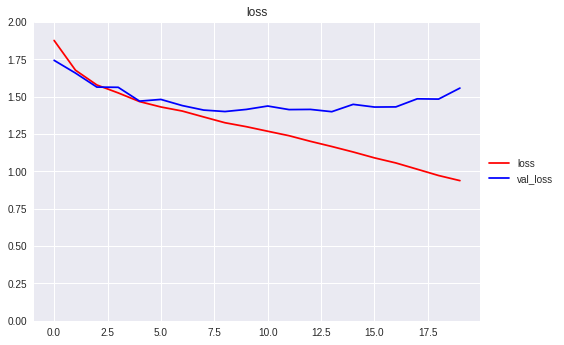

In [34]:
epochs = 20
x = range(epochs)
plt.plot(x, history3.history['acc'], label='acc', color='r')
plt.plot(x, history3.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history3.history['loss'], label='loss', color='r')
plt.plot(x, history3.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [0]:
# 4
model4 = Sequential()
model4.add(Flatten(input_shape=(32, 32, 3)))
model4.add(Dense(1024))
model4.add(Activation('relu'))

model4.add(Dense(1024))
model4.add(Activation('relu'))

model4.add(Dense(1024))
model4.add(Activation('relu'))

model4.add(Dense(1024))
model4.add(Activation('relu'))

model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
batch_size = 128
epochs = 20
history4 = model4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 146us/step - loss: 1.8991 - acc: 0.3059 - val_loss: 1.7645 - val_acc: 0.3494
Epoch 2/20
45000/45000 [==============================] - 6s 129us/step - loss: 1.7130 - acc: 0.3814 - val_loss: 1.6687 - val_acc: 0.3962
Epoch 3/20
45000/45000 [==============================] - 6s 129us/step - loss: 1.6254 - acc: 0.4117 - val_loss: 1.5837 - val_acc: 0.4266
Epoch 4/20
45000/45000 [==============================] - 6s 129us/step - loss: 1.5538 - acc: 0.4414 - val_loss: 1.6064 - val_acc: 0.4222
Epoch 5/20
45000/45000 [==============================] - 6s 129us/step - loss: 1.4940 - acc: 0.4641 - val_loss: 1.4954 - val_acc: 0.4686
Epoch 6/20
45000/45000 [==============================] - 6s 130us/step - loss: 1.4563 - acc: 0.4755 - val_loss: 1.5031 - val_acc: 0.4672
Epoch 7/20
45000/45000 [==============================] - 6s 132us/step - loss: 1.4144 - acc: 0.4926 - val_loss: 1.5016 - v

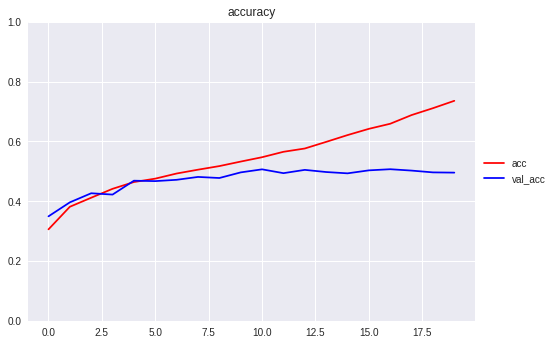

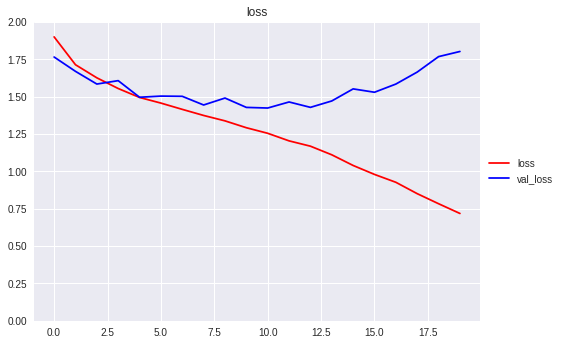

In [37]:
epochs = 20
x = range(epochs)
plt.plot(x, history4.history['acc'], label='acc', color='r')
plt.plot(x, history4.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history4.history['loss'], label='loss', color='r')
plt.plot(x, history4.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 2.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [0]:
# 5
model5 = Sequential()
model5.add(Flatten(input_shape=(32, 32, 3)))
model5.add(Dense(10))
model5.add(Activation('relu'))

model5.add(Dense(4))
model5.add(Activation('relu'))

model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
batch_size = 128
epochs = 20
history5 = model5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 3s 75us/step - loss: 2.1926 - acc: 0.1564 - val_loss: 2.1840 - val_acc: 0.1680
Epoch 2/20
45000/45000 [==============================] - 3s 66us/step - loss: 2.1148 - acc: 0.1804 - val_loss: 2.0853 - val_acc: 0.1906
Epoch 3/20
45000/45000 [==============================] - 3s 66us/step - loss: 2.0774 - acc: 0.1843 - val_loss: 2.0578 - val_acc: 0.1922
Epoch 4/20
45000/45000 [==============================] - 3s 66us/step - loss: 2.0489 - acc: 0.1890 - val_loss: 2.0158 - val_acc: 0.2058
Epoch 5/20
45000/45000 [==============================] - 3s 65us/step - loss: 1.9824 - acc: 0.2293 - val_loss: 1.9192 - val_acc: 0.2636
Epoch 6/20
45000/45000 [==============================] - 3s 65us/step - loss: 1.9032 - acc: 0.2751 - val_loss: 1.8841 - val_acc: 0.2908
Epoch 7/20
45000/45000 [==============================] - 3s 64us/step - loss: 1.8780 - acc: 0.2843 - val_loss: 1.8805 - val_acc:

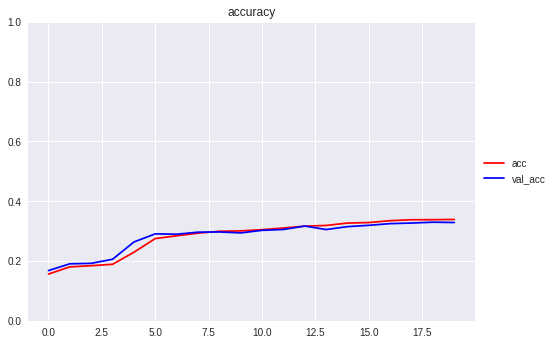

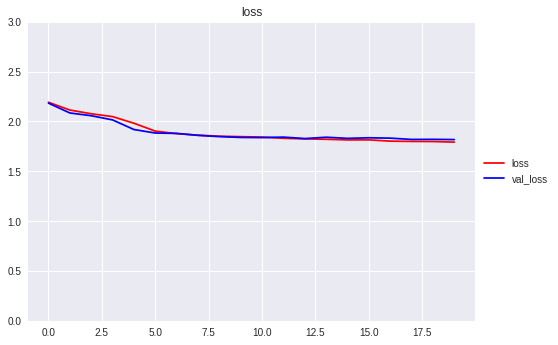

In [41]:
epochs = 20
x = range(epochs)
plt.plot(x, history5.history['acc'], label='acc', color='r')
plt.plot(x, history5.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history5.history['loss'], label='loss', color='r')
plt.plot(x, history5.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# データを減らした場合

In [0]:
# 4.1
def init_model():
    model41 = Sequential()
    model41.add(Flatten(input_shape=(32, 32, 3)))
    model41.add(Dense(512))
    model41.add(Activation('relu'))

    model41.add(Dense(128))
    model41.add(Activation('relu'))

    model41.add(Dense(10))
    model41.add(Activation('softmax'))

    model41.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model41

In [89]:
!pip install tqdm

In [0]:
from tqdm import tqdm

In [92]:
histories = {}
batch_size = 128
epochs = 20
for i in tqdm([2500, 5000, 10000, 20000, 50000]):
    XX_train = X_train[:i]
    yy_train = y_train[:i]
    m = init_model()
    histories[i] = m.fit(XX_train, yy_train, batch_size=batch_size,
                                    epochs=epochs, verbose=0,validation_split=0.1)

100%|██████████| 5/5 [02:15<00:00, 33.08s/it]


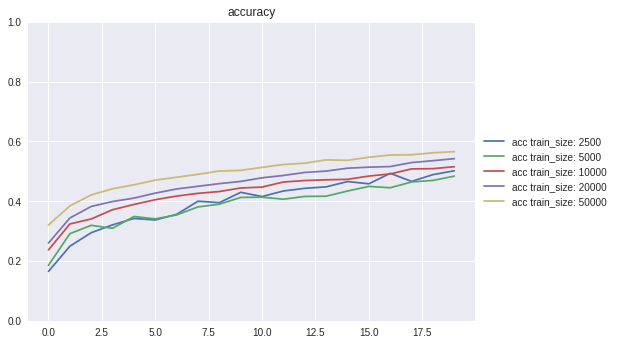

In [98]:
x = range(epochs)
for train_size, h in histories.items():
    plt.plot(x, h.history['acc'], label='acc train_size: {}'.format(train_size))
    # plt.plot(x, h.history['val_acc'], label='val_acc train_size: {}'.format(train_size))

plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

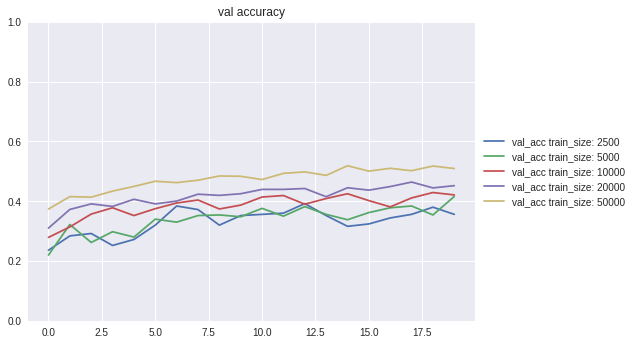

In [99]:
x = range(epochs)
for train_size, h in histories.items():
    plt.plot(x, h.history['val_acc'], label='val_acc train_size: {}'.format(train_size))

plt.ylim(0.0, 1.0)
plt.title('val accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

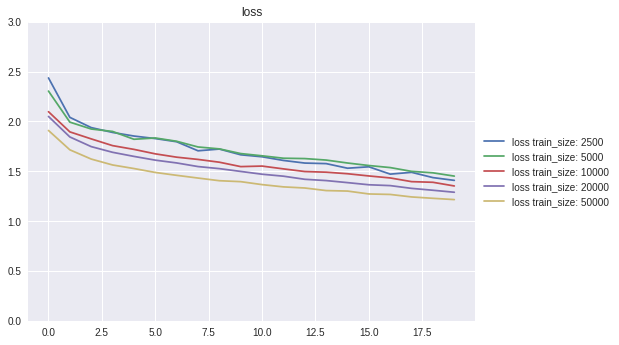

In [102]:
x = range(epochs)
for train_size, h in histories.items():
    plt.plot(x, h.history['loss'], label='loss train_size: {}'.format(train_size))

plt.ylim(0.0, 3.0)
plt.title('loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

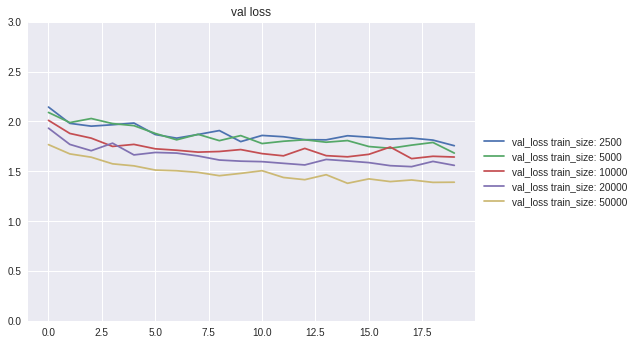

In [103]:
x = range(epochs)
for train_size, h in histories.items():
    plt.plot(x, h.history['val_loss'], label='val_loss train_size: {}'.format(train_size))

plt.ylim(0.0, 3.0)
plt.title('val loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

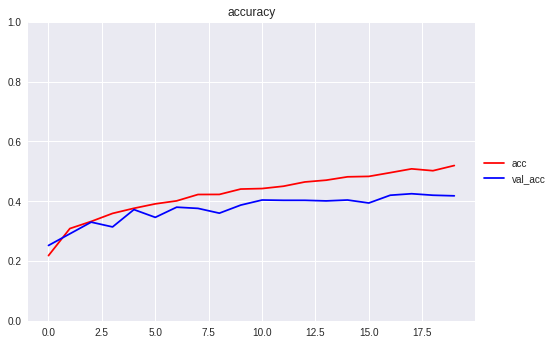

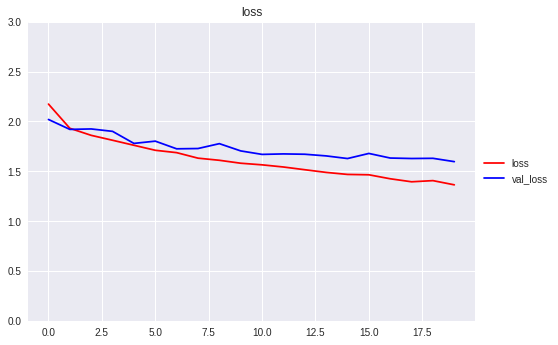

In [85]:
epochs = 20
x = range(epochs)
plt.plot(x, history41.history['acc'], label='acc', color='r')
plt.plot(x, history41.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history41.history['loss'], label='loss', color='r')
plt.plot(x, history41.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 過学習のモデルにdropoutを追加

In [0]:
from keras.layers import Dropout


# 6
model6 = Sequential()
model6.add(Flatten(input_shape=(32, 32, 3)))
model6.add(Dense(1024))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))

model6.add(Dense(1024))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))

model6.add(Dense(1024))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))

model6.add(Dense(1024))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))

model6.add(Dense(10))
model6.add(Activation('softmax'))

model6.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
batch_size = 128
epochs = 20
history6 = model6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 162us/step - loss: 2.0121 - acc: 0.2529 - val_loss: 1.8484 - val_acc: 0.3326
Epoch 2/20
45000/45000 [==============================] - 6s 139us/step - loss: 1.8799 - acc: 0.3118 - val_loss: 1.8397 - val_acc: 0.3310
Epoch 3/20
45000/45000 [==============================] - 6s 140us/step - loss: 1.8506 - acc: 0.3199 - val_loss: 1.8025 - val_acc: 0.3432
Epoch 4/20
45000/45000 [==============================] - 6s 139us/step - loss: 1.8236 - acc: 0.3315 - val_loss: 1.8029 - val_acc: 0.3548
Epoch 5/20
45000/45000 [==============================] - 6s 139us/step - loss: 1.7998 - acc: 0.3452 - val_loss: 1.7459 - val_acc: 0.3894
Epoch 6/20
45000/45000 [==============================] - 6s 140us/step - loss: 1.7797 - acc: 0.3490 - val_loss: 1.7661 - val_acc: 0.3662
Epoch 7/20
45000/45000 [==============================] - 6s 139us/step - loss: 1.7587 - acc: 0.3648 - val_loss: 1.6747 - v

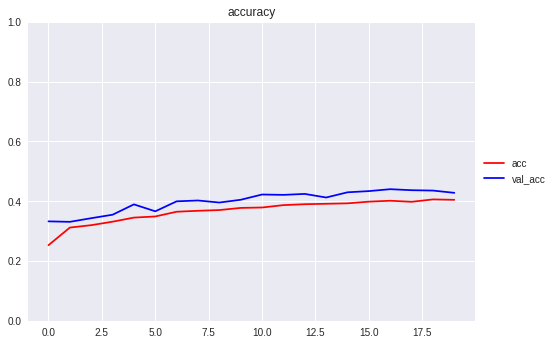

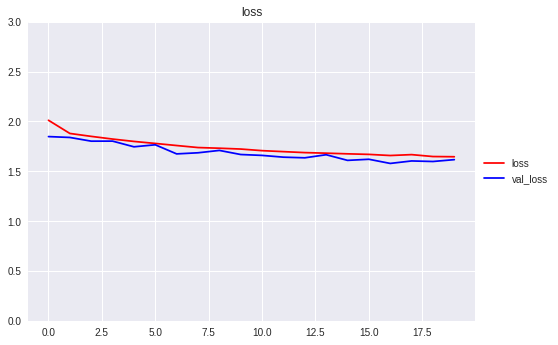

In [48]:
epochs = 20
x = range(epochs)
plt.plot(x, history6.history['acc'], label='acc', color='r')
plt.plot(x, history6.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history6.history['loss'], label='loss', color='r')
plt.plot(x, history6.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 過学習のmodelにBatchNormalizationを追加

In [0]:
from keras.layers import BatchNormalization


# 7
model7 = Sequential()
model7.add(Flatten(input_shape=(32, 32, 3)))
model7.add(Dense(1024))
model7.add(BatchNormalization())
model7.add(Activation('relu'))

model7.add(Dense(1024))
model7.add(BatchNormalization())
model7.add(Activation('relu'))

model7.add(Dense(1024))
model7.add(BatchNormalization())
model7.add(Activation('relu'))

model7.add(Dense(1024))
model7.add(BatchNormalization())
model7.add(Activation('relu'))

model7.add(Dense(10))
model7.add(BatchNormalization())
model7.add(Activation('softmax'))

model7.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
batch_size = 128
epochs = 20
history7 = model7.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 281us/step - loss: 1.6258 - acc: 0.4240 - val_loss: 1.7463 - val_acc: 0.3756
Epoch 2/20
45000/45000 [==============================] - 11s 237us/step - loss: 1.4164 - acc: 0.5022 - val_loss: 1.8216 - val_acc: 0.3558
Epoch 3/20
45000/45000 [==============================] - 11s 237us/step - loss: 1.3044 - acc: 0.5457 - val_loss: 2.1577 - val_acc: 0.3034
Epoch 4/20
45000/45000 [==============================] - 11s 237us/step - loss: 1.2042 - acc: 0.5777 - val_loss: 1.7250 - val_acc: 0.3986
Epoch 5/20
45000/45000 [==============================] - 11s 235us/step - loss: 1.1196 - acc: 0.6117 - val_loss: 1.6768 - val_acc: 0.4168
Epoch 6/20
45000/45000 [==============================] - 11s 236us/step - loss: 1.0430 - acc: 0.6367 - val_loss: 2.0245 - val_acc: 0.3394
Epoch 7/20
45000/45000 [==============================] - 11s 235us/step - loss: 0.9563 - acc: 0.6696 - val_loss: 1.8

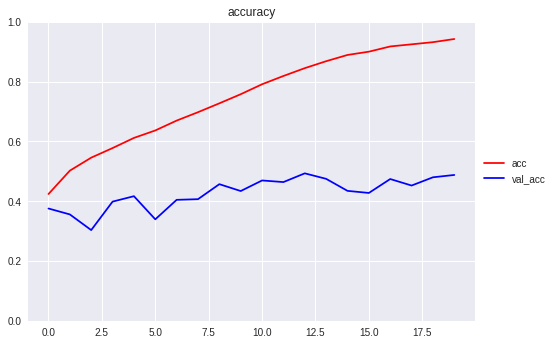

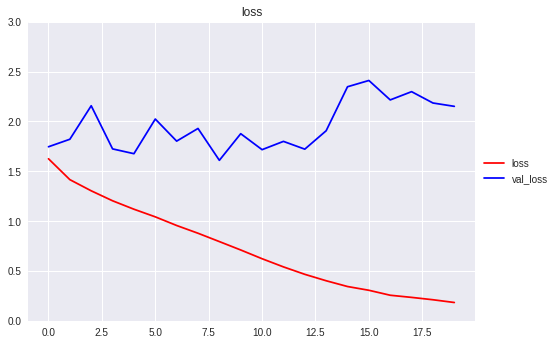

In [51]:
epochs = 20
x = range(epochs)
plt.plot(x, history7.history['acc'], label='acc', color='r')
plt.plot(x, history7.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history7.history['loss'], label='loss', color='r')
plt.plot(x, history7.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# BatchNormalizationとdropoutどっちも使う

In [0]:
# 8
model8 = Sequential()
model8.add(Flatten(input_shape=(32, 32, 3)))
model8.add(Dense(1024))
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model3.add(Dropout(0.25))

model8.add(Dense(1024))
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model3.add(Dropout(0.25))

model8.add(Dense(1024))
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model3.add(Dropout(0.25))

model8.add(Dense(1024))
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model3.add(Dropout(0.25))

model8.add(Dense(10))
model8.add(BatchNormalization())
model8.add(Activation('softmax'))

model8.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
batch_size = 128
epochs = 20
history8 = model8.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 284us/step - loss: 1.6200 - acc: 0.4301 - val_loss: 1.8774 - val_acc: 0.3388
Epoch 2/20
45000/45000 [==============================] - 11s 238us/step - loss: 1.4131 - acc: 0.5045 - val_loss: 1.9553 - val_acc: 0.3208
Epoch 3/20
45000/45000 [==============================] - 11s 236us/step - loss: 1.3014 - acc: 0.5451 - val_loss: 1.7156 - val_acc: 0.4008
Epoch 4/20
45000/45000 [==============================] - 11s 236us/step - loss: 1.2027 - acc: 0.5822 - val_loss: 1.6621 - val_acc: 0.4258
Epoch 5/20
45000/45000 [==============================] - 11s 235us/step - loss: 1.1185 - acc: 0.6114 - val_loss: 1.6171 - val_acc: 0.4588
Epoch 6/20
45000/45000 [==============================] - 11s 236us/step - loss: 1.0353 - acc: 0.6416 - val_loss: 1.8728 - val_acc: 0.3814
Epoch 7/20
45000/45000 [==============================] - 11s 237us/step - loss: 0.9511 - acc: 0.6721 - val_loss: 1.7

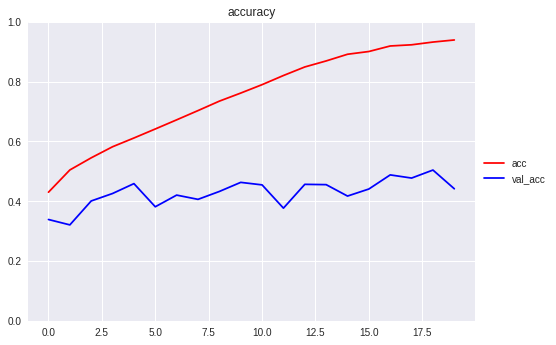

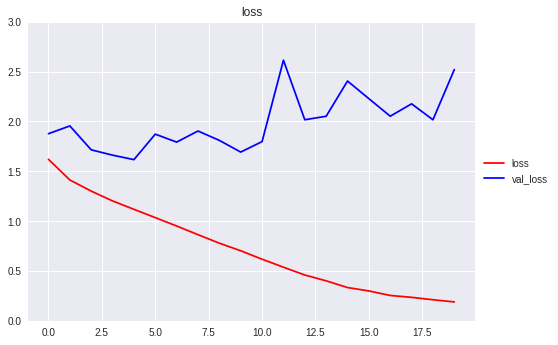

In [54]:
epochs = 20
x = range(epochs)
plt.plot(x, history8.history['acc'], label='acc', color='r')
plt.plot(x, history8.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 1.0)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history8.history['loss'], label='loss', color='r')
plt.plot(x, history8.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(0.0, 3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()